# Dataset

In [ ]:
api_token = {"username":"", "key":""}

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

import json
with open("/root/.kaggle/kaggle.json", "w") as file:
    json.dump(api_token, file)

!chmod 600 /root/.kaggle/kaggle.json

!kaggle competitions download -c m5-forecasting-accuracy #https://www.kaggle.com/competitions/m5-forecasting-accuracy/data?select=calendar.csv
!unzip m5-forecasting-accuracy.zip

 96% 44.0M/45.8M [00:00<00:00, 74.3MB/s]
100% 45.8M/45.8M [00:00<00:00, 71.7MB/s]
Archive:  m5-forecasting-accuracy.zip
  inflating: calendar.csv            
  inflating: sales_train_evaluation.csv  
  inflating: sales_train_validation.csv  
  inflating: sample_submission.csv   
  inflating: sell_prices.csv         


In [ ]:
# calendar.csv - Contains information about the dates on which the products are sold.
# sales_train_validation.csv - Contains the historical daily unit sales data per product and store [d_1 - d_1913]
# sell_prices.csv - Contains information about the price of the products sold per store and date.
# sales_train_evaluation.csv - Includes sales [d_1 - d_1941] (labels used for the Public leaderboard)

# sample_submission.csv - The correct format for submissions. Reference the Evaluation tab for more info.
# -
# Each row contains an id that is a concatenation of an item_id and a store_id, which is either validation (corresponding to the Public leaderboard)
# , or evaluation (corresponding to the Private leaderboard). You are predicting 28 forecast days (F1-F28) of items sold for each row. For
# the validation rows, this corresponds to d_1914 - d_1941, and for the evaluation rows, this corresponds to d_1942 - d_1969. (Note: a month
# before the competition close, the ground truth for the validation rows will be provided.)

In [ ]:
import pandas as pd

In [ ]:
calendar = pd.read_csv("calendar.csv")
sales_train_validation = pd.read_csv("sales_train_validation.csv")
sell_prices = pd.read_csv("sell_prices.csv")
sample_submission = pd.read_csv("sample_submission.csv")
sales_train_evaluation = pd.read_csv("sales_train_evaluation.csv")

In [ ]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [ ]:
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [ ]:
print(sales_train_validation.shape)
sales_train_validation.head()

(30490, 1919)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [ ]:
print(sales_train_evaluation.shape)
sales_train_evaluation.head()

(30490, 1947)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [ ]:
print(sample_submission.shape)
sample_submission.head()

(60980, 29)


,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sample_submission

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,FOODS_3_823_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60976,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60977,FOODS_3_825_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60978,FOODS_3_826_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# EDA

## Data prep. (df_store)

In [ ]:
df = sales_train_evaluation.groupby("store_id").sum().iloc[:, 5:]
df

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
store_id,,,,,,,,,,,,,,,,,,,,,
CA_1,4337,4155,2816,3051,2630,3276,3450,5437,4340,3157,...,4951,6245,6707,4568,3949,3995,4136,4433,5764,6289
CA_2,3494,3046,2121,2324,1942,2288,2629,3729,2957,2218,...,4839,6507,6710,4238,3963,3789,4037,4751,7120,6614
CA_3,4739,4827,3785,4232,3817,4369,4703,5456,5581,4912,...,6046,7029,7969,5891,5523,5375,5580,5542,7073,8144
CA_4,1625,1777,1386,1440,1536,1389,1469,1988,1818,1535,...,2635,3256,3318,3024,2715,2519,2544,2704,3146,3597
TX_1,2556,2687,1822,2258,1694,2734,1691,2820,2887,2174,...,3610,3787,5000,3708,3310,3147,2748,3664,4167,4624
TX_2,3852,3937,2731,2954,2492,3439,2588,3772,3657,2932,...,4415,4424,5866,4179,4008,3518,3126,4249,4802,5217
TX_3,3030,3006,2225,2169,1726,2833,1947,2848,2832,2213,...,4295,4155,5383,4341,4052,3710,3288,4390,4712,4974
WI_1,2704,2194,1562,1251,2,2049,2815,3248,1674,1355,...,3978,5527,5488,3505,3323,3242,3478,3813,5002,5054
WI_2,2256,1922,2018,2522,1175,2244,2232,2643,2140,1836,...,5317,7704,7586,5011,4628,4533,4628,4880,5213,5068


In [ ]:
df_transposed = df.T
df_transposed["d"] = df_transposed.index
df_transposed

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,d
d_1,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038,d_1
d_2,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198,d_2
d_3,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317,d_3
d_4,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211,d_4
d_5,2630,1942,3817,1536,1694,2492,1726,2,1175,2132,d_5
...,...,...,...,...,...,...,...,...,...,...,...
d_1937,3995,3789,5375,2519,3147,3518,3710,3242,4533,3268,d_1937
d_1938,4136,4037,5580,2544,2748,3126,3288,3478,4628,3398,d_1938
d_1939,4433,4751,5542,2704,3664,4249,4390,3813,4880,4126,d_1939
d_1940,5764,7120,7073,3146,4167,4802,4712,5002,5213,4519,d_1940


In [ ]:
df_store = pd.merge(df_transposed, calendar, how="left", left_on="d", right_on="d")
df_store["date"] = pd.to_datetime(df_store["date"])
df_store

,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198,...,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317,...,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211,...,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,2630,1942,3817,1536,1694,2492,1726,2,1175,2132,...,5,2,2011,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,3995,3789,5375,2519,3147,3518,3710,3242,4533,3268,...,5,5,2016,NaN,NaN,NaN,NaN,0,0,0
1937,4136,4037,5580,2544,2748,3126,3288,3478,4628,3398,...,6,5,2016,NaN,NaN,NaN,NaN,0,0,0
1938,4433,4751,5542,2704,3664,4249,4390,3813,4880,4126,...,7,5,2016,NaN,NaN,NaN,NaN,0,0,0
1939,5764,7120,7073,3146,4167,4802,4712,5002,5213,4519,...,1,5,2016,NaN,NaN,NaN,NaN,0,0,0


In [ ]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CA_1          1941 non-null   int64         
 1   CA_2          1941 non-null   int64         
 2   CA_3          1941 non-null   int64         
 3   CA_4          1941 non-null   int64         
 4   TX_1          1941 non-null   int64         
 5   TX_2          1941 non-null   int64         
 6   TX_3          1941 non-null   int64         
 7   WI_1          1941 non-null   int64         
 8   WI_2          1941 non-null   int64         
 9   WI_3          1941 non-null   int64         
 10  d             1941 non-null   object        
 11  date          1941 non-null   datetime64[ns]
 12  wm_yr_wk      1941 non-null   int64         
 13  weekday       1941 non-null   object        
 14  wday          1941 non-null   int64         
 15  month         1941 non-null   int64   

In [ ]:
store_ids = df_store.columns[:10]
store_ids

Index(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2',
       'WI_3'],
      dtype='object')

# Model- PatchTST

In [ ]:
!pip install -q neuralforecast
# !pip install -q datasetsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.5/221.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.4/223.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.4 MB/s eta 0:00:00


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from neuralforecast.core import NeuralForecast
from neuralforecast.models import NHITS, NBEATS, PatchTST

from neuralforecast.losses.pytorch import MAE
from neuralforecast.losses.numpy import mae, mse, rmse

# from datasetsforecast.long_horizon import LongHorizon

In [ ]:
torch.cuda.is_available()

False

In [ ]:
df_store.head()

,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198,...,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317,...,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211,...,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,2630,1942,3817,1536,1694,2492,1726,2,1175,2132,...,5,2,2011,NaN,NaN,NaN,NaN,1,0,1


In [ ]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CA_1          1941 non-null   int64         
 1   CA_2          1941 non-null   int64         
 2   CA_3          1941 non-null   int64         
 3   CA_4          1941 non-null   int64         
 4   TX_1          1941 non-null   int64         
 5   TX_2          1941 non-null   int64         
 6   TX_3          1941 non-null   int64         
 7   WI_1          1941 non-null   int64         
 8   WI_2          1941 non-null   int64         
 9   WI_3          1941 non-null   int64         
 10  d             1941 non-null   object        
 11  date          1941 non-null   datetime64[ns]
 12  wm_yr_wk      1941 non-null   int64         
 13  weekday       1941 non-null   object        
 14  wday          1941 non-null   int64         
 15  month         1941 non-null   int64   

###### v2

In [ ]:
from neuralforecast.losses.pytorch import MQLoss, DistributionLoss

In [ ]:
#df_store.columns
columns_list = ["d", "date", "wm_yr_wk", "weekday", "wday", "month", "year",
       "event_name_1", "event_type_1", "event_name_2", "event_type_2",
       "snap_CA", "snap_TX", "snap_WI"]

store_id = "CA_1"
df_store_particular = df_store[[store_id]+ columns_list].copy()
df_store_particular.head()

,CA_1,d,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,4337,d_1,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,4155,d_2,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,2816,d_3,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,3051,d_4,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,2630,d_5,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1


In [ ]:
for colname in df_store_particular.columns:
  print("*"*50)
  print(colname)
  print("*"*50)
  print(df_store_particular[colname].value_counts(dropna=False))

**************************************************
CA_1
**************************************************
CA_1
4018    5
0       5
3818    5
3843    5
3702    4
       ..
4441    1
4817    1
2886    1
5075    1
6289    1
Name: count, Length: 1476, dtype: int64
**************************************************
d
**************************************************
d
d_1       1
d_1276    1
d_1304    1
d_1303    1
d_1302    1
         ..
d_643     1
d_642     1
d_641     1
d_640     1
d_1941    1
Name: count, Length: 1941, dtype: int64
**************************************************
date
**************************************************
date
2011-01-29    1
2014-07-27    1
2014-08-24    1
2014-08-23    1
2014-08-22    1
             ..
2012-11-01    1
2012-10-31    1
2012-10-30    1
2012-10-29    1
2016-05-22    1
Name: count, Length: 1941, dtype: int64
**************************************************
wm_yr_wk
**************************************************
wm_yr_wk
11101    7
1

In [ ]:
df_store_particular.describe()

,CA_1,date,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI
count,1941.000000,1941,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,4035.161257,2013-09-25 00:00:00,11343.166924,3.997424,6.334879,2013.249356,0.329727,0.329727,0.329727
min,0.000000,2011-01-29 00:00:00,11101.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000
25%,3359.000000,2012-05-28 00:00:00,11218.000000,2.000000,3.000000,2012.000000,0.000000,0.000000,0.000000
50%,3918.000000,2013-09-25 00:00:00,11335.000000,4.000000,6.000000,2013.000000,0.000000,0.000000,0.000000
75%,4653.000000,2015-01-23 00:00:00,11451.000000,6.000000,9.000000,2015.000000,1.000000,1.000000,1.000000
max,6948.000000,2016-05-22 00:00:00,11617.000000,7.000000,12.000000,2016.000000,1.000000,1.000000,1.000000
std,994.891371,NaN,152.899023,2.001158,3.440086,1.557375,0.470235,0.470235,0.470235


In [ ]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

qualitative_cols = ["event_name_1", "event_type_1", "event_name_2", "event_type_2"]
for colname in qualitative_cols:
  print(colname)
  df_store_particular[colname] = le.fit_transform(df_store_particular[colname])

df_store_particular.head()

event_name_1
event_type_1
event_name_2
event_type_2


,CA_1,d,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,4337,d_1,2011-01-29,11101,Saturday,1,1,2011,30,4,4,2,0,0,0
1,4155,d_2,2011-01-30,11101,Sunday,2,1,2011,30,4,4,2,0,0,0
2,2816,d_3,2011-01-31,11101,Monday,3,1,2011,30,4,4,2,0,0,0
3,3051,d_4,2011-02-01,11101,Tuesday,4,2,2011,30,4,4,2,1,1,0
4,2630,d_5,2011-02-02,11101,Wednesday,5,2,2011,30,4,4,2,1,0,1


In [ ]:
train_numbers = np.arange(1, 1886)
valid_numbers = np.arange(1886, 1914)
test_numbers = np.arange(1914, 1942)

train_days = ["d_"+str(num) for num in train_numbers]
valid_days = ["d_"+str(num) for num in valid_numbers]
test_days = ["d_"+str(num) for num in test_numbers]

days_list = train_days + valid_days + test_days

df_train_valid_test = pd.DataFrame({"d": days_list, "data_type": ["train"]*len(train_numbers) + ["valid"]*len(valid_numbers) + ["test"]*len(test_numbers)})
df_train_valid_test

,d,data_type
0,d_1,train
1,d_2,train
2,d_3,train
3,d_4,train
4,d_5,train
...,...,...
1936,d_1937,test
1937,d_1938,test
1938,d_1939,test
1939,d_1940,test


In [ ]:
df_store_particular2 = pd.merge(df_store_particular, df_train_valid_test, how="left", left_on="d", right_on="d")
df_store_particular2.head()

,CA_1,d,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,data_type
0,4337,d_1,2011-01-29,11101,Saturday,1,1,2011,30,4,4,2,0,0,0,train
1,4155,d_2,2011-01-30,11101,Sunday,2,1,2011,30,4,4,2,0,0,0,train
2,2816,d_3,2011-01-31,11101,Monday,3,1,2011,30,4,4,2,0,0,0,train
3,3051,d_4,2011-02-01,11101,Tuesday,4,2,2011,30,4,4,2,1,1,0,train
4,2630,d_5,2011-02-02,11101,Wednesday,5,2,2011,30,4,4,2,1,0,1,train


In [ ]:
df_store_particular2 = df_store_particular2.drop(["d", "wm_yr_wk", "weekday"], axis=1)
df_store_particular2["unique_id"] = 0
df_store_particular2 = df_store_particular2.rename(columns={"CA_1": "y", "date": "ds"})
df_store_particular2.head()

,y,ds,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,data_type,unique_id
0,4337,2011-01-29,1,1,2011,30,4,4,2,0,0,0,train,0
1,4155,2011-01-30,2,1,2011,30,4,4,2,0,0,0,train,0
2,2816,2011-01-31,3,1,2011,30,4,4,2,0,0,0,train,0
3,3051,2011-02-01,4,2,2011,30,4,4,2,1,1,0,train,0
4,2630,2011-02-02,5,2,2011,30,4,4,2,1,0,1,train,0


In [ ]:
patchtst_train_df = df_store_particular2[df_store_particular2["data_type"]=="train"].drop("data_type", axis=1)
patchtst_valid_df = df_store_particular2[df_store_particular2["data_type"]=="valid"].drop("data_type", axis=1)
patchtst_test_df = df_store_particular2[df_store_particular2["data_type"]=="test"].drop("data_type", axis=1)
print(patchtst_train_df.shape)
print(patchtst_valid_df.shape)
print(patchtst_test_df.shape)

(1885, 13)
(28, 13)
(28, 13)


In [ ]:
patchtst_train_df.dtypes

y                        int64
ds              datetime64[ns]
wday                     int64
month                    int64
year                     int64
event_name_1             int64
event_type_1             int64
event_name_2             int64
event_type_2             int64
snap_CA                  int64
snap_TX                  int64
snap_WI                  int64
unique_id                int64
dtype: object

In [ ]:
patchtst_train_df.columns

Index(['y', 'ds', 'wday', 'month', 'year', 'event_name_1', 'event_type_1',
       'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI',
       'unique_id'],
      dtype='object')

In [ ]:
patchtst_train_df.head()

,y,ds,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,unique_id
0,4337,2011-01-29,1,1,2011,30,4,4,2,0,0,0,0
1,4155,2011-01-30,2,1,2011,30,4,4,2,0,0,0,0
2,2816,2011-01-31,3,1,2011,30,4,4,2,0,0,0,0
3,3051,2011-02-01,4,2,2011,30,4,4,2,1,1,0,0
4,2630,2011-02-02,5,2,2011,30,4,4,2,1,0,1,0


In [ ]:
horizon = len(valid_numbers)
val_size = len(valid_numbers)

In [ ]:
model = PatchTST(h=horizon,
                 input_size=2*horizon,
                 #stat_exog_list = ["wday", "month", "year", "event_name_1", "event_type_1", "event_name_2", "event_type_2", "snap_CA", "snap_TX", "snap_WI"],
                 patch_len=28,
                 stride=28,
                 revin=False,
                 hidden_size=16,
                 n_heads=16,
                 scaler_type='robust',
                 loss=DistributionLoss(distribution='StudentT', level=[80, 90]),
                 #loss=MAE(),
                 learning_rate=1e-3,
                 max_steps=500, #epoch count
                 val_check_steps=100,
                 early_stop_patience_steps=2)

nf = NeuralForecast(
    models=[model],
    freq='D'
)
nf.fit(df=patchtst_train_df, val_size=val_size)
patchtst_forecast = nf.predict(futr_df=patchtst_valid_df)


INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type              | Params
---------------------------------------------------
0 | loss         | DistributionLoss  | 5     
1 | padder_train | ConstantPad1d     | 0     
2 | scaler       | TemporalNorm      | 0     
3 | model        | PatchTST_backbone | 33.5 K
---------------------------------------------------
33.5 K    Trainable params
8         Non-trainable params
33.5 K    Total params
0.134     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=500` reached.
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
print(patchtst_forecast.shape)
patchtst_forecast.head()

(28, 7)


,ds,PatchTST,PatchTST-median,PatchTST-lo-90,PatchTST-lo-80,PatchTST-hi-80,PatchTST-hi-90
unique_id,,,,,,,
0,2016-03-28,3908.775391,3918.275391,3566.915527,3648.768311,4149.630371,4224.499512
0,2016-03-29,3790.897217,3789.879395,3490.274170,3570.769287,4023.833496,4103.448242
0,2016-03-30,3749.135010,3746.584717,3407.664795,3496.407715,4010.726074,4104.783203
0,2016-03-31,3796.782959,3792.848145,3505.064941,3582.532715,4006.284668,4115.007812
0,2016-04-01,4368.953613,4368.833984,4023.040039,4111.873535,4631.740234,4756.273926


In [ ]:
patchtst_valid_df.head()

,y,ds,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,unique_id
1885,3905,2016-03-28,3,3,2016,30,4,4,2,0,0,0,0
1886,3788,2016-03-29,4,3,2016,30,4,4,2,0,0,0,0
1887,3339,2016-03-30,5,3,2016,30,4,4,2,0,0,0,0
1888,4076,2016-03-31,6,3,2016,30,4,4,2,0,0,0,0
1889,4983,2016-04-01,7,4,2016,30,4,4,2,1,1,0,0


(28, 6)
(28, 19)
(100, 19)


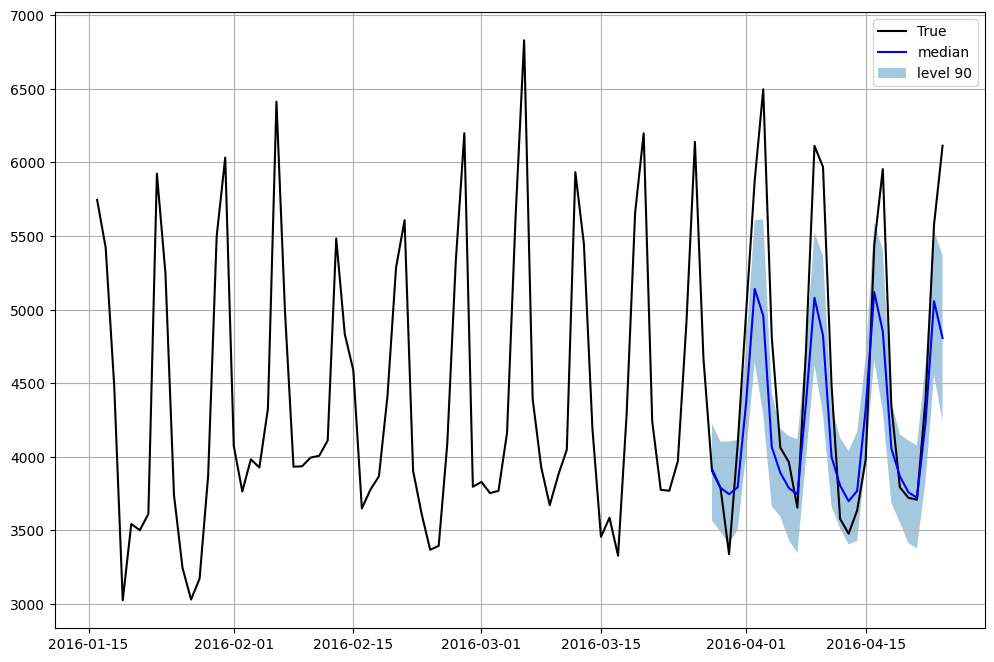

In [ ]:
patchtst_valid_df_pred = patchtst_forecast.reset_index().drop(columns=['unique_id','ds'])
print(patchtst_valid_df_pred.shape)
plot_df = pd.concat([patchtst_valid_df.reset_index(drop=True), patchtst_valid_df_pred], axis=1)
print(plot_df.shape)
plot_df = pd.concat([patchtst_train_df, plot_df])
plot_df = plot_df.iloc[-100:, :]
print(plot_df.shape)
plot_df.head()

if model.loss.is_distribution_output:
    fig = plt.figure(figsize=(12, 8))
    plt.plot(plot_df['ds'], plot_df['y'], c='black', label='True')
    plt.plot(plot_df['ds'], plot_df['PatchTST-median'], c='blue', label='median')
    plt.fill_between(x=plot_df['ds'][-len(valid_numbers):],
                    y1=plot_df['PatchTST-lo-90'][-len(valid_numbers):].values,
                    y2=plot_df['PatchTST-hi-90'][-len(valid_numbers):].values,
                    alpha=0.4, label='level 90')
    plt.grid()
    plt.legend()
    plt.plot()
else:
    plot_df = plot_df.drop('unique_id', axis=1)
    plt.plot(plot_df['ds'], plot_df['y'], c='black', label='True')
    plt.plot(plot_df['ds'], plot_df['PatchTST'], c='blue', label='Forecast')
    plt.legend()
    plt.grid()


In [ ]:
y_true = patchtst_valid_df["y"].values
y_pred_patchtst = patchtst_forecast["PatchTST"].values

print(y_true.shape)
print(y_pred_patchtst.shape)

(28,)
(28,)


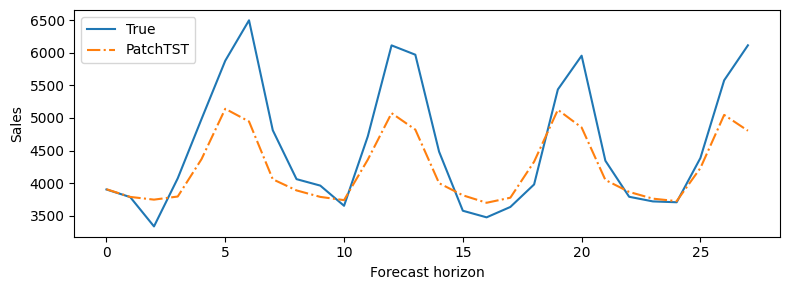

In [ ]:
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(y_true, label="True")
ax.plot(y_pred_patchtst, label="PatchTST", ls="-.")
ax.set_ylabel("Sales")
ax.set_xlabel("Forecast horizon")
ax.legend(loc="best")

plt.tight_layout()

In [ ]:
data = {"PatchTST": [mae(y_pred_patchtst, y_true), mse(y_pred_patchtst, y_true), rmse(y_pred_patchtst, y_true)]}

metrics_df = pd.DataFrame(data=data)
metrics_df.index = ["mae", "mse", "rmse"]
metrics_df

,PatchTST
mae,449.526995
mse,379180.541602
rmse,615.776373
